In [1]:
import numpy as np
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
# to have a clean notebook
import warnings
warnings.filterwarnings('ignore')


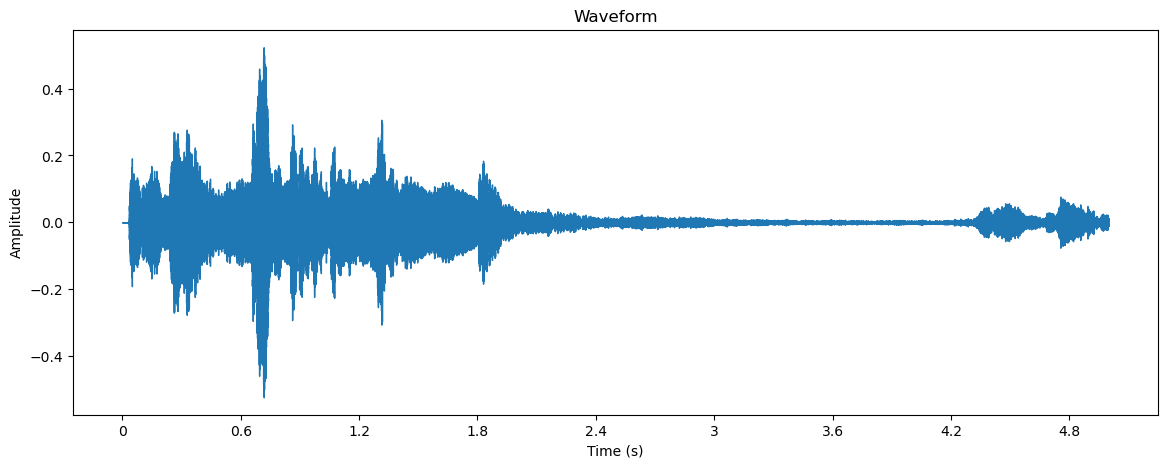

In [4]:
#extra
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

test_filename = 'E:/Github Repositories/BharatIntern/major_project/dataset/Persian Classical Music Instrument Recognition (PCMIR) Database/Kamancheh/Kamancheh (1).mp3'
plt.figure(figsize=(14, 5))

# the sample rate is the number of samples of audio we take in a second; by default, it is 22 kHz
data, sample_rate = librosa.load(test_filename, duration=5)  # Update duration to match your comment
librosa.display.waveshow(data, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

ipd.Audio(test_filename)


In [3]:
# librosa is a tool to read audio files and transform it to waves
test_filename='E:/Github Repositories/BharatIntern/major_project/dataset/Persian Classical Music Instrument Recognition (PCMIR) Database/Santur/Santur (1).mp3'
plt.figure(figsize=(14,5))
# the sample rate is the nbr of samples of audio we take in a seconde by default it is 22 khz 
data,sample_rate=librosa.load(test_filename, duration=4)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(test_filename)
# all files are 5s length

AttributeError: module 'librosa.display' has no attribute 'waveplot'

<Figure size 1400x500 with 0 Axes>

In [5]:
print(f"The shape of data :  {data.shape}")
print(f"The sample rate is : {sample_rate}")


The shape of data :  (110250,)
The sample rate is : 22050


Text(0.5, 1.0, 'Power spectrum')

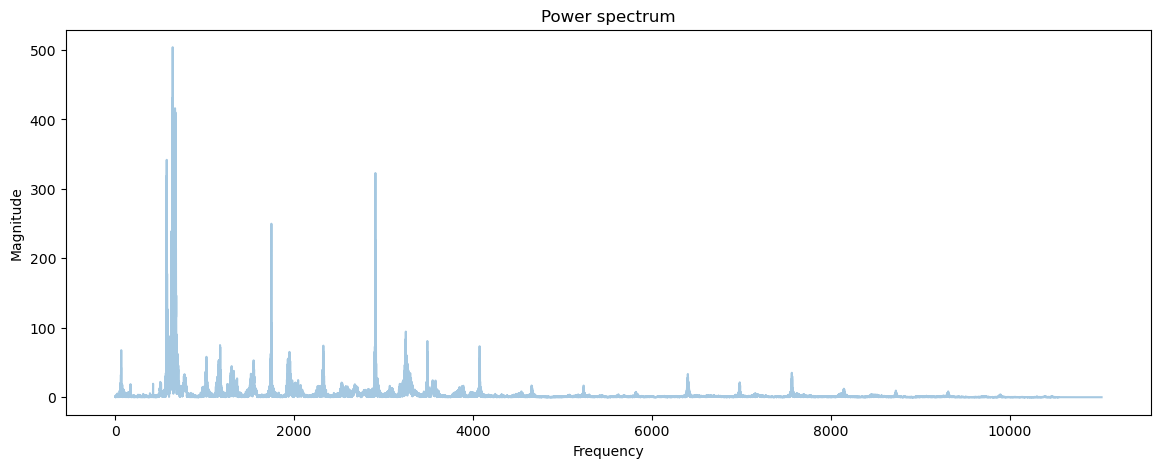

In [6]:
# We apply a Fast Fourier Transform (FFT) to extract information from the sound.

fft = np.fft.fft(data)

# calculate abs value to get magnitude
spectrum = np.abs(fft)

# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

# take half of the spectrum and frequency because with the fft we will get a mirror diagram so we take only the half 
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
plt.figure(figsize=(14,5))
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

Text(0.5, 1.0, 'Spectrogram')

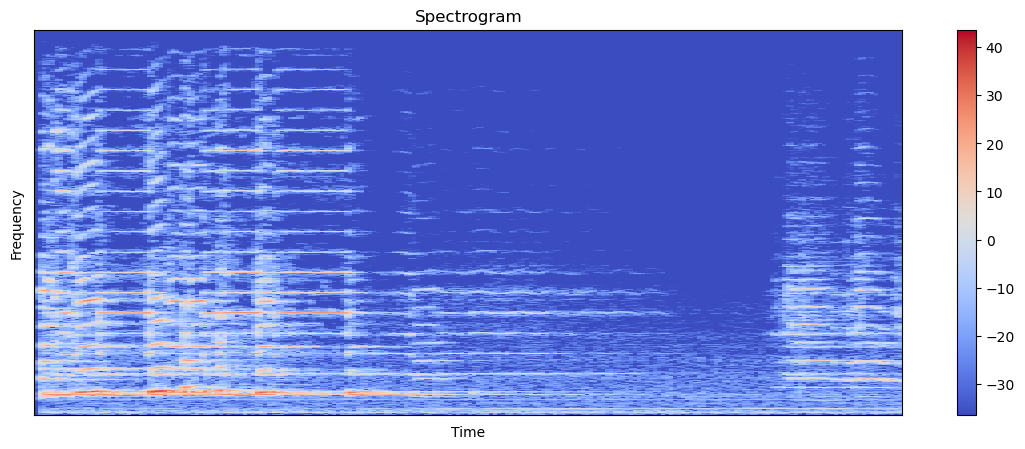

In [7]:
# We applied STFT to add temporal dimension to the graph.
 
hop_length = 512 # how many sample we move between each step
n_fft = 2048 # how many samples to take for each fft step

# perform stft
stft = librosa.stft(data, n_fft=n_fft, hop_length=hop_length)

# calculate abs value to get magnitude
spectrogram = np.abs(stft)
# Tranforming the values of spectrogram to Dicibel
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(14,5))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")


In [8]:
# We will extract the MFCC features from our data
# PS : to train our model we have the choice between either MFCC or STFT
MFCCs = librosa.feature.mfcc(data, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
# generally n_mfcc is between 13 and 40
# display MFCCs
plt.figure(figsize=(14,5))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

TypeError: mfcc() takes 0 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

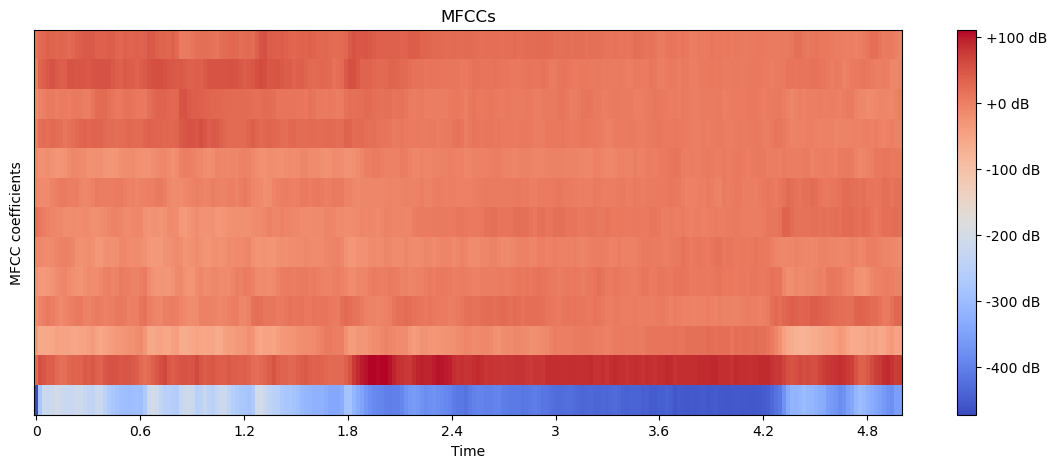

In [11]:
#extra
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Assuming you have already loaded the audio data and set the sample_rate
# data, sample_rate = librosa.load(test_filename, duration=5)

# Extract MFCCs
MFCCs = librosa.feature.mfcc(y=data, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# Display MFCCs
plt.figure(figsize=(14, 5))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length, x_axis='time')
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar(format="%+2.0f dB")
plt.title("MFCCs")
plt.show()


In [12]:
print(f"The shape of MFCC: {MFCCs.shape}")

The shape of MFCC: (13, 216)


In [13]:
import os
from tqdm import tqdm
def read_data(dataset_path):
    hop_length = 512 
    n_fft = 2048 
    x, y = [],[]
    classes = os.listdir(dataset_path)
    classes.remove("ReadMe.txt")
    for classe in classes:
        print(classe)
        files = os.listdir(os.path.join(dataset_path,str(classe)))
        for file in tqdm(files):
            file_path = os.path.join(dataset_path,str(classe),str(file))
            signal, sample_rate = librosa.load(file_path,duration=4 )
            MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
            # here we will use both of this values and see wich one is better 
            # i think the use of the transpose is for the shapes to be correct
            mfcc = MFCCs.T
            x.append(mfcc)
            y.append(classe)
    y = np.array(pd.get_dummies(y))
    return x, y

In [19]:
#extra
import os
import librosa

def read_data(dataset_path, n_fft=2048, hop_length=512):
    data = []
    labels = []

    for classe in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, classe)

        # Check if the item is a directory
        if os.path.isdir(class_path):
            for file in os.listdir(class_path):
                file_path = os.path.join(class_path, file)

                # Check if the item is a file
                if os.path.isfile(file_path):
                    continue  # Skip non-directory files

                # Load the audio file
                signal, sample_rate = librosa.load(file_path, duration=4)

                # Extract MFCC features
                mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

                # Append the features and label
                data.append(mfccs)
                labels.append(classe)

    return data, labels

# Example usage
dataset_path = "E:/Github Repositories/BharatIntern/major_project/dataset/Persian Classical Music Instrument Recognition (PCMIR) Database"
x, y = read_data(dataset_path)


In [34]:
# dataset_path = "E:/Github Repositories/BharatIntern/major_project/dataset/Persian Classical Music Instrument Recognition (PCMIR) Database"
x, y = read_data("E:/Github Repositories/BharatIntern/major_project/dataset/Persian Classical Music Instrument Recognition (PCMIR) Database")


In [36]:
#extra
print(f'the length of x is {len(x)}')

if len(x) > 0:
    print(f'the length of the first item in x is {len(x[0])}')

    if len(x[0]) > 0:
        print(f'the shape of the first item in x is {x[0][0].shape}')

print(f'the length of y is {len(y)}')


the length of x is 0
the length of y is 0


In [39]:
print(f'the shape of x is {len(x),len(x[0]),len(x[0][0])}')
print(f'the shape of y is {y.shape}')

IndexError: list index out of range

In [38]:
# Print the length of x and the shape of its elements
print(f'Length of x: {len(x)}')
if len(x) > 0:
    print(f'Shape of x[0]: {len(x[0]) if len(x[0]) > 0 else "Empty"}, {len(x[0][0]) if len(x[0]) > 0 and len(x[0][0]) > 0 else "Empty"}')

# Print the shape of y
print(f'Shape of y: {y.shape if hasattr(y, "shape") else "Not applicable"}')


Length of x: 0
Shape of y: Not applicable


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(x), y, test_size=0.25, random_state=42)

ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming x is a list of NumPy arrays
x_array = np.array(x)

# Print the length of x_array and length of y
print(f'Length of x_array: {len(x_array)}')
print(f'Length of y: {len(y)}')

# Check the content of x_array and y
print(f'Content of x_array: {x_array}')
print(f'Content of y: {y}')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x_array, y, test_size=0.25, random_state=42)


Length of x_array: 0
Length of y: 0
Content of x_array: []
Content of y: []


ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [44]:
X_train.shape, X_test.shape

NameError: name 'X_train' is not defined

In [45]:
# Assuming x is a list of NumPy arrays
x_array = np.array(x)

# Print the shape of x_array and length of y before splitting
print(f'Shape of x_array before splitting: {x_array.shape}')
print(f'Length of y before splitting: {len(y)}')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x_array, y, test_size=0.25, random_state=42)

# Print the shapes after splitting
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')


Shape of x_array before splitting: (0,)
Length of y before splitting: 0


ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [48]:
from sklearn.model_selection import train_test_split

# Assuming x is your data and y is your labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [49]:
print(f'Length of x: {len(x)}')
print(f'Length of y: {len(y)}')


Length of x: 0
Length of y: 0


In [51]:
print(x[:5])  # Print the first 5 samples of x
print(y[:5])  # Print the first 5 samples of y


[]
[]


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


ValueError: With n_samples=0, test_size=0.1 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

<h2>In this section we will evaluate multiple ML algos to the problem</h2>

<h1> Artificial Neural Network</h1>

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import tensorflow.keras as keras

In [14]:
# the kernel_regularizer and dropout are used to prevent over fitting
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1], activation="softmax"))

2021-11-03 12:59:00.312031: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-03 12:59:00.434683: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-03 12:59:00.435736: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-03 12:59:00.437218: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2249)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               576000    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=300)

2021-11-03 12:59:09.804239: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300
8/8 [==============================] - 2s 41ms/step - loss: 74.0436 - accuracy: 0.2164 - val_loss: 11.5106 - val_accuracy: 0.3201
Epoch 2/300
8/8 [==============================] - 0s 8ms/step - loss: 30.7202 - accuracy: 0.2330 - val_loss: 5.2159 - val_accuracy: 0.3101
Epoch 3/300
8/8 [==============================] - 0s 9ms/step - loss: 15.9396 - accuracy: 0.2950 - val_loss: 3.7815 - val_accuracy: 0.4444
Epoch 4/300
8/8 [==============================] - 0s 8ms/step - loss: 9.7892 - accuracy: 0.2983 - val_loss: 2.6428 - val_accuracy: 0.4461
Epoch 5/300
8/8 [==============================] - 0s 8ms/step - loss: 5.9649 - accuracy: 0.3105 - val_loss: 2.4178 - val_accuracy: 0.4527
Epoch 6/300
8/8 [==============================] - 0s 9ms/step - loss: 3.8939 - accuracy: 0.2950 - val_loss: 2.2050 - val_accuracy: 0.4544
Epoch 7/300
8/8 [==============================] - 0s 9ms/step - loss: 2.8323 - accuracy: 0.3160 - val_loss: 2.3141 - val_accuracy: 0.3449
Epoch 8/300
8/8 [=====

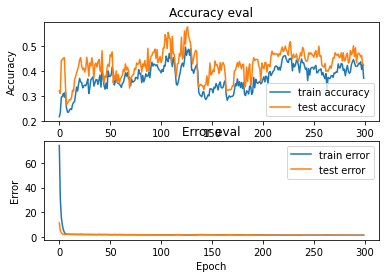

In [18]:
def plot_history(history):
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()
plot_history(history)

<h1>Convolutional neural network</h1>

In [19]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization

In [20]:
# conv2d expects a 4d array
X_train_cnn = X_train[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]
X_train_cnn.shape,X_test_cnn.shape

((1807, 173, 13, 1), (603, 173, 13, 1))

In [21]:
# batch normlization helps the model converge way faster
cnn = Sequential()

# 1 st covolution layer
cnn.add(Conv2D(32, (3,3),activation='relu', input_shape=(X_train.shape[1], X_train.shape[2],1)))
cnn.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.3))
# 2 nd covolution layer
cnn.add(Conv2D(32, (3,3),activation='relu', input_shape=(X_train.shape[1], X_train.shape[2],1)))
cnn.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.3))
# 3 rd covolution layer
cnn.add(Conv2D(32, (2,2),activation='relu', input_shape=(X_train.shape[1], X_train.shape[2],1)))
cnn.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.3))
# ann layer
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
cnn.add(Dropout(0.3))

# output
cnn.add(Dense(y_train.shape[1], activation='softmax'))

In [22]:
cnn.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
cnn_history = cnn.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), batch_size=256, epochs=200)

Epoch 1/200


2021-11-03 12:59:49.737105: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


8/8 [==============================] - 7s 60ms/step - loss: 2.3015 - accuracy: 0.2701 - val_loss: 5.1424 - val_accuracy: 0.2338
Epoch 2/200
8/8 [==============================] - 0s 14ms/step - loss: 1.7499 - accuracy: 0.4527 - val_loss: 3.7316 - val_accuracy: 0.3068
Epoch 3/200
8/8 [==============================] - 0s 14ms/step - loss: 1.4534 - accuracy: 0.5445 - val_loss: 3.1541 - val_accuracy: 0.2852
Epoch 4/200
8/8 [==============================] - 0s 14ms/step - loss: 1.3641 - accuracy: 0.5634 - val_loss: 2.5748 - val_accuracy: 0.3167
Epoch 5/200
8/8 [==============================] - 0s 14ms/step - loss: 1.2354 - accuracy: 0.6182 - val_loss: 2.1805 - val_accuracy: 0.3466
Epoch 6/200
8/8 [==============================] - 0s 13ms/step - loss: 1.1823 - accuracy: 0.6292 - val_loss: 1.8025 - val_accuracy: 0.4063
Epoch 7/200
8/8 [==============================] - 0s 14ms/step - loss: 1.0990 - accuracy: 0.6641 - val_loss: 1.7507 - val_accuracy: 0.4328
Epoch 8/200
8/8 [===============

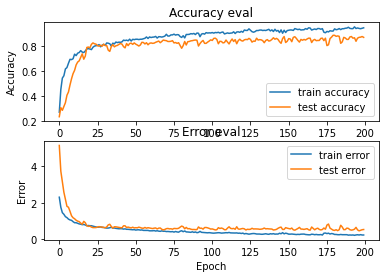

In [23]:
plot_history(cnn_history)

<h1>Recurent Neural Network "LSTM"</h1>

In [24]:
from tensorflow.keras.layers import LSTM,Bidirectional
lstm = Sequential()

# stack of 2 bidirectional lstm
lstm.add(Bidirectional(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)))
lstm.add(Bidirectional(LSTM(64)))
lstm.add(Dropout(0.3))

# dense layer with kernel regulizer and dropout to prevent overfitting
lstm.add(Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
lstm.add(Dropout(0.3))

# output
lstm.add(Dense(y_train.shape[1], activation='softmax'))

In [25]:
lstm.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
lstm_history = lstm.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=200)

Epoch 1/200
8/8 [==============================] - 10s 288ms/step - loss: 1.8480 - accuracy: 0.2125 - val_loss: 1.6677 - val_accuracy: 0.4428
Epoch 2/200
8/8 [==============================] - 1s 65ms/step - loss: 1.6017 - accuracy: 0.4073 - val_loss: 1.3979 - val_accuracy: 0.5688
Epoch 3/200
8/8 [==============================] - 1s 65ms/step - loss: 1.3959 - accuracy: 0.5091 - val_loss: 1.1820 - val_accuracy: 0.6368
Epoch 4/200
8/8 [==============================] - 1s 66ms/step - loss: 1.2109 - accuracy: 0.5778 - val_loss: 1.0713 - val_accuracy: 0.6517
Epoch 5/200
8/8 [==============================] - 1s 66ms/step - loss: 1.0848 - accuracy: 0.6414 - val_loss: 0.9605 - val_accuracy: 0.7098
Epoch 6/200
8/8 [==============================] - 1s 66ms/step - loss: 0.9803 - accuracy: 0.6868 - val_loss: 0.9200 - val_accuracy: 0.7131
Epoch 7/200
8/8 [==============================] - 1s 67ms/step - loss: 0.9560 - accuracy: 0.7034 - val_loss: 0.8867 - val_accuracy: 0.7015
Epoch 8/200
8/8 [=

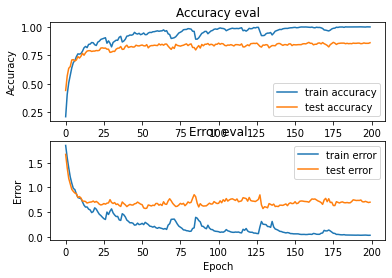

In [26]:
plot_history(lstm_history)